(Project) Build a machine to summarise text
- Underlying concepts: transformer-based seq2seq langauge model called 't5-small', transfer-learning, huggingface datasets, 

About the project model
- **This project make use of the 't5-small' model**
- T5 model is a type of seq2seq model and T5 model make use of transformer, t5-small is a fewer-paratmer and scaled-down version of t5 model 
- **Seq2Seq (Sequence-to-Sequence) model**: A Seq2Seq model is a deep learning architecture designed for tasks where the input and output are both sequences of data. seq2seq typically consist of multiple layers of recurrent or Transformer neural networks). Transformers have gained popularity due to their effectiveness in various sequence-based tasks, such as natural language processing (NLP), and they have been used in machine translation, text summarization, and more.
-  **T5 model (Text-To-Text Transfer Transformer)**: built upon transformer.  T5 leverages the Transformer architecture's self-attention mechanism to process text data effectively.

Use free google colab to train the model using **GPU**
  - If you don't have nvidia GPU or a compatible GPU
  - Google Colab offers different GPU options, including Tesla K80, P100, T4, and others. You can choose the GPU that suits your needs
  - Google colab provides persistant storage
  - Google Colab offers free access to GPUs, which are often NVIDIA GPUs. While the exact GPU model may vary, they are generally more powerful and optimized for deep learning compared to integrated graphics solutions. **If your laptop does not have a dedicated NVIDIA GPU or an equivalent GPU suitable for deep learning tasks, using Google Colab's free (often) NVIDIA GPU resources is likely to provide better performance for training machine learning and deep learning models**

What is sequence-to-sequence (Seq2Seq) models
- used primarily for natural language processing tasks, effective in tasks where the input and output are both sequences
- Common applications of Seq2Seq models include machine translation, text summarization, question answering, and conversational modeling (like chatbots)

Key Components of Seq2Seq Models:
- **Encoder**: reads the entire article word by word (or token by token) and encodes the information into a **context vector. This encoding captures the essence** of the news article, including its key points, themes, and any relevant details.
- **Context Vector**: represents the compressed information of the input sequence.
- **Decoder**: to generate the news summary based on the context vector. It takes this condensed representation and begins to construct the summary, word by word.

How Seq2Seq Works:
- **Training**: During training, the Seq2Seq model is presented with pairs of full news articles and their corresponding summaries. The encoder learns to compress news articles into context vectors, while the decoder learns to convert these vectors back into concise summaries. The model learns patterns and structures common in summarizing such articles.

- **Inference**: For making predictions, the encoder processes a new, unseen news article to create a context vector. The decoder then uses this vector to generate a summary. The model produces one word at a time, and **each newly generated word is considered in generating the next one, until a coherent summary is formed.**

T5 Model
- **Text-To-Text Framework**: T5 is unique in that it frames almost all NLP tasks as text-to-text tasks. In a text-to-text framework, both the input and output are treated as text, regardless of the specific NLP task. This approach allows T5 to handle a wide range of NLP tasks, including text classification, text generation, translation, summarization, question answering, and more, by simply rephrasing the input and output in a consistent text format.
  - **Traditional Approaches**: In traditional machine learning and deep learning models, the input and output data formats are typically task-specific. For example, in image classification, the input is an image, and the output is a class label. In speech recognition, the input is an audio waveform, and the output is a transcribed text. These models are tailored to specific tasks and data types.
  - **Specialization**: Many machine learning models are designed with a particular task or data type in mind. For example, Convolutional Neural Networks (CNNs) excel in image-related tasks,**while Recurrent Neural Networks (RNNs) are often used for sequential data like text**.
  - **T5's Uniqueness**: T5's uniqueness lies in its approach to handling a wide range of NLP tasks within a consistent text-to-text framework. Instead of designing separate models for different NLP tasks like translation, summarization, question answering, etc., T5 frames them all as text-to-text tasks. This means that regardless of the specific task, both the input and output are treated as text.
  - **T5 for translation**, the input might be "Translate English to French: The cat is on the mat," and the output is the translated text.
  - **T5 for summarization**, the input could be "Summarize the following article: [article text]," and the output is the summary text.
  - **T5 for question answering**, the input might be "Answer the following question: Who is the president of the United States?", and the output is the answer text.
- T5's text-to-text framework is achieved through the **use of prefixes**.
  - Translation Task:
    - Prefix: "Translate English to French: "
  - Summarization Task:
    - Prefix: "Summarize the following article: "
  - Question Answering Task:
    - Prefix: "Answer the following question: "
- **Pre-trained Model**: T5 is typically trained on large text corpora using unsupervised pre-training, followed by fine-tuning on specific downstream NLP tasks. Pre-trained T5 models are capable of generalizing across various NLP tasks, making them versatile and effective for a wide range of applications.
- **Transfer Learning**: T5 is an example of a transfer learning approach in machine learning, where a model trained on a large, diverse dataset, **which means pretrained t5 model is a generalised language model that can be fine-tuned on specific tasks with smaller amounts of task-specific data**. This transfer learning capability has made T5 particularly valuable in NLP, as it can be fine-tuned for specific tasks with relatively limited labeled data.

How to further improve this seq2seq model
- use "ts-large"
- use "split=train" subset of 'multi_news'
- adjust max length of input document and output summary
- summaries generated may end mid-sentence, prevent this
- if run into memory error, reduce these numbers from 10 to 8 or 4. If there are more memory available, increase these numbers to make the training faster
  - per_device_train_batch_size=10
  - per_device_eval_batch_size=10
- increase number of epochs (to increase number of times we run through the entire dataset), this may further reduce loss function until it fully converges (aka no more significant reduction in loss function)

Alternative solutions to this seq2seq model
- **Variants and Improvements for News Summarization**:
Attention Mechanism: In news summarization, attention mechanisms are particularly beneficial. They allow the model to focus on different parts of the article while generating each part of the summary. This is crucial because a summary needs to capture key points spread throughout the article.
- **Transformer Models**: The Transformer architecture, which relies entirely on attention mechanisms without recurrent layers, has become particularly popular for summarization tasks. Models like BERT and GPT are based on Transformer architecture and have been successfully applied to summarizing news articles due to their ability to handle long sequences of data effectively and capture contextual relationships in the text
- In summary, Seq2Seq models are well-suited for news summarization tasks. They leverage their encoder-decoder structure to understand and compress lengthy news articles into succinct, informative summaries, capturing the essence of the original content. Advances like attention mechanisms and the Transformer architecture have further enhanced their effectiveness in this domain.

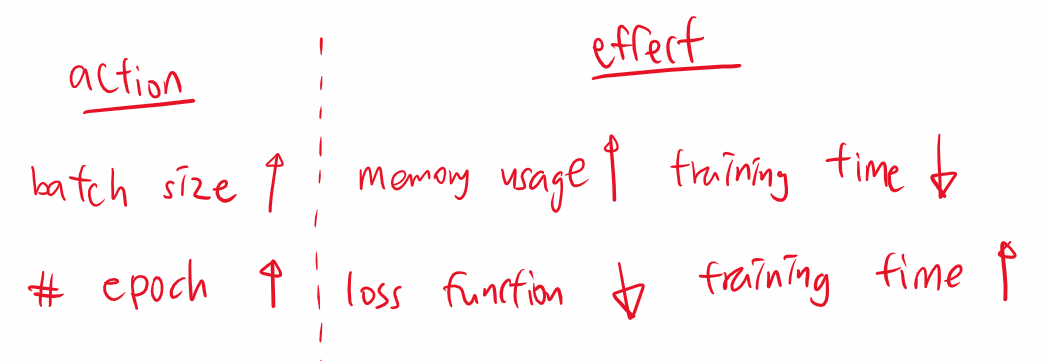

In [3]:
import warnings
warnings.filterwarnings("ignore")


- "! pip install datasets"
  - install the "datasets" library from huggingface which contain a lot of free datasets
- https://huggingface.co/datasets

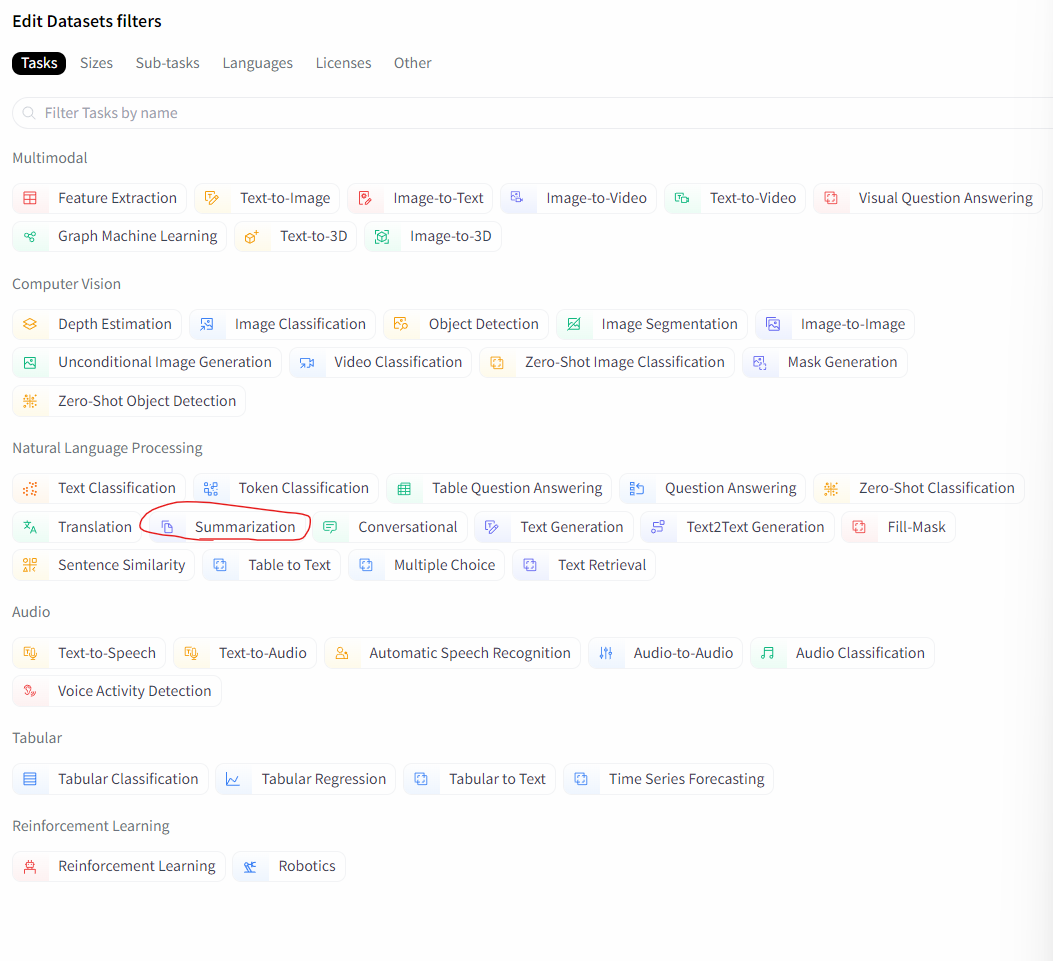

In [ ]:
# ! pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html
# ! pip install datasets
# ! pip install rouge # a metric to evaluate the summary
# ! pip install transformers
# !pip show transformers
# !pip show accelerate
# !pip install accelerate --upgrade
# !pip install accelerate -U
# ! pip install torch
# ! pip install -U accelerate
# ! pip install -U transformers
# ! pip install transformers

Load dataset

In [5]:
from datasets import load_dataset
multi_news = load_dataset("multi_news", split="test")
# https://huggingface.co/datasets/multi_news?row=0

# Datasets are often divided into different splits for training, validation, and testing purposes
# "split="test" is to load the "test" split

View Data

In [6]:
multi_news.to_pandas()

,document,summary
0,GOP Eyes Gains As Voters In 11 States Pick Gov...,– It's a race for the governor's mansion in 11...
1,\n \n \n \n UPDATE: 4/19/2001 Read Richard Met...,– It turns out Facebook is only guilty of abou...
2,It's the Golden State's latest version of the ...,– Not a big fan of Southern California? Neithe...
3,The seed for this crawl was a list of every ho...,– Why did Microsoft buy Nokia's phone business...
4,After a year in which liberals scored impressi...,– The Supreme Court is facing a docket of high...
...,...,...
5617,Tweet with a location \n \n You can add locati...,– The traditional end-of-summit group photo at...
5618,Loic Venance/AFP/Getty Images \n \n The awards...,– Sofia Coppola scored a historic victory at t...
5619,(CNN) A federal criminal investigation into a ...,– The duck boat sinking that killed 17 on a Mi...
5620,An archive of the public statements deleted by...,– Note to tweeting politicians: Watch what you...


Train test split (80:20 ratio respectively)

In [8]:
multi_news = multi_news.train_test_split(test_size=0.2)

Tokenizing Training and testing sets

- use "t5-small" pretrained language model, which is based on transformer architecture
- "t5-large" is the main one
-  T5 (Text-to-Text Transfer Transformer)
- This tokenizer is specifically trained and optimized to work with the "t5-small" model, ensuring that the input text is correctly processed for this particular model architecture.
- The T5 model, being a versatile transformer model, is capable of handling a variety of tasks like text summarization, translation, question-answering, etc., but it requires the input to be in a tokenized form that it understands.

In [10]:
from transformers import AutoTokenizer
# (Q) What is the "transformers" library
# transformers is a widely-used library that provides a range of
# pre-trained models for Natural Language Processing (NLP) tasks such
# as text classification, translation, summarization

# (Q) What is AutoTokenizer
# A tokenizer is responsible for converting raw text into a format that
# is understandable by the model. This includes splitting the text into
# tokens (like words or subwords), converting tokens to their respective
# IDs in a pre-defined vocabulary, and applying other text preprocessing
# steps like padding and truncation.

tokenizer = AutoTokenizer.from_pretrained("t5-small")

In [11]:
prefix = "summarize: " # tell machine that we want to "summarize" every input data

def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["document"]]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True) # max document length is 1024
    labels = tokenizer(text=examples["summary"], max_length=128, truncation=True) # max len of summary is 128
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
tokenized_multi_news = multi_news.map(preprocess_function, batched=True)

# (Q) .map(function,)
# apply "preprocess_function" to every single element (or batch of element)

# (Q) "batched=True"?
# indicates that the preprocess_function should be applied to the dataset in batches rather than individual examples. Processing data in batches is typically more efficient, especially when dealing with large datasets.

Model Loading

- DataCollatorForSeq2Seq
  - A data collator is used to dynamically create batches of data during training. This specific collator is designed for seq2seq
- AutoModelForSeq2SeqLM: This class is used to automatically retrieve a specific Seq2Seq language model from a given model identifier.
- Seq2SeqTrainingArguments: This class is used to define training arguments/parameters for training a Seq2Seq model.
- Seq2SeqTrainer: This class is responsible for training a Seq2Seq model using the specified model, data, and training arguments.

In [13]:
from transformers import DataCollatorForSeq2Seq, AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model='t5-small')
# model='t5-small' --> indicates that the collator should prepare data suitable for the 't5-small' model
# data_collator --> makes the training and testing sets into appropriately-sized tensors

model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")
# This method downloads and caches the 't5-small' model, a smaller
# variant of the T5 model optimized for Seq2Seq tasks. If the model is
# already downloaded, it is loaded from the cache.

Defining Hyperparameters

What is checkpoint
- checkpoints (or model checkpoints) are saved state of a model at a specific point during training
- They contain various pieces of information, including the model's architecture, weights of the neurons, training configuration (like the optimizer, learning rate), and the state of the optimizer. This allows the training to be paused and resumed without loss of progress.
- **Save Format**: Typically, these are saved in a file format specific to the framework being used (like .h5 or .ckpt files in TensorFlow).
- **Early Stopping**: Checkpoints work well with early stopping strategies, where training is halted once the model's performance on validation data ceases to improve. You can then use the best-performing checkpoint for your final model.

save_total_limit=3
- this means the 3 latest checkpoints will be saved, and the latest checkpoint (i.e. **checkpoint-4500") is the fully trained model
- **major uses of the latest trained model are for actual deployment, or further training with new data in the future**

folder "checkpoint-4500"
- later version of checkpoints has higher number, the number corresponds to the training step or epoch at which the checkpoint was saved.

In [19]:
training_args = Seq2SeqTrainingArguments(
  output_dir="./results", # where model checkpoints will be saved
  evaluation_strategy="epoch", # evaluate model (and save checkpoint) at end of each training epoch
  learning_rate=2e-5, # learning rate for the optimizer. A learning rate of 2e-5 (or 0.00002) is a common choice for fine-tuning models in NLP tasks.
  per_device_train_batch_size=10, # 10 examples will be processed simultaneously during training on each device (i.e. gpu or cpu)
  per_device_eval_batch_size=10, # 10 examples will be processed simultaneously during evaluation on each device  (i.e. gpu or cpu)
  weight_decay=0.01, # regularization parameter that helps prevent overfitting. It adds an additional term to the cost function related to the size of the model weights, which encourages smaller weights
  save_total_limit=3, # 3 checkpoints
  num_train_epochs=10, # Sets the number of epochs for training. An epoch is one complete pass through the entire training dataset.
  fp16=True, # use 16-bit floating values (as opposed to default 32-bit) which can reduce memory usage and potentially increase training speed, especially on GPUs that support it.
  )


Initializing Trainer

In [20]:
trainer = Seq2SeqTrainer(
  model=model,
  args=training_args,
  train_dataset=tokenized_multi_news["train"],
  eval_dataset=tokenized_multi_news["test"],
  tokenizer=tokenizer,
  data_collator=data_collator,
  )


Train the Text Summarization Model

In [21]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,2.844625
2,3.260400,2.783377
3,3.007700,2.754442
4,2.939300,2.737289
5,2.938900,2.728251
6,2.899400,2.719347
7,2.895800,2.716068
8,2.884200,2.712122
9,2.875900,2.709291
10,2.867400,2.709397


TrainOutput(global_step=4500, training_loss=2.9521104871961805, metrics={'train_runtime': 2858.6142, 'train_samples_per_second': 15.731, 'train_steps_per_second': 1.574, 'total_flos': 1.217264162439168e+16, 'train_loss': 2.9521104871961805, 'epoch': 10.0})

In [29]:
import shutil
import os

### save 'results' folder which contain checkpoints as zip
# shutil.make_archive('/content/results', 'zip', '/content/results') #first path is the name of zip folder, second path is the input folder to be converted to zip


trainer.save_model("trained_model")
#### save trained_model as zip
#shutil.make_archive('trained_model', 'zip', 'trained_model')
# shutil.make_archive('/content/trained_model', 'zip', '/content/trained_model') #first path is the name of zip folder, second path is the input folder to be converted to zip


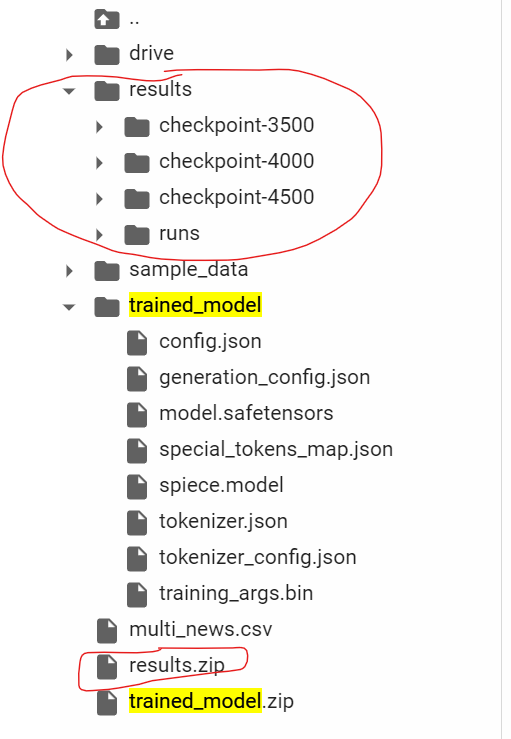

In [ ]:
# to load trained model
# loading a trained model depend on how the model is trained and saved
# model = AutoModel.from_pretrained("trained_model")


Evaluate model on a single document

In [22]:
document = "National Archives Yes, it's that time again, folks. It's the first Friday of the month, when for one ever-so-brief moment the interests of Wall Street, Washington and Main Street are all aligned on one thing: Jobs. A fresh update on the U.S. employment situation for January hits the wires at 8:30 a.m. New York time offering one of the most important snapshots on how the economy fared during the previous month. Expectations are for 203,000 new jobs to be created, according to economists polled by Dow Jones Newswires, compared to 227,000 jobs added in February. The unemployment rate is expected to hold steady at 8.3%. Here at MarketBeat HQ, we’ll be offering color commentary before and after the data crosses the wires. Feel free to weigh-in yourself, via the comments section. And while you're here, why don't you sign up to follow us on Twitter. Enjoy the show. ||||| Employers pulled back sharply on hiring last month, a reminder that the U.S. economy may not be growing fast enough to sustain robust job growth. The unemployment rate dipped, but mostly because more Americans stopped looking for work. The Labor Department says the economy added 120,000 jobs in March, down from more than 200,000 in each of the previous three months. The unemployment rate fell to 8.2 percent, the lowest since January 2009. The rate dropped because fewer people searched for jobs. The official unemployment tally only includes those seeking work. The economy has added 858,000 jobs since December _ the best four months of hiring in two years. But Federal Reserve Chairman Ben Bernanke has cautioned that the current hiring pace is unlikely to continue without more consumer spending."
human_summary = """– The unemployment rate dropped to 8.2% last month, but the economy only added 120,000 jobs, when 203,000 new jobs had been predicted, according to today's jobs report. Reaction on the Wall Street Journal's MarketBeat Blog was swift: "Woah!!! Bad number." The unemployment rate, however, is better news; it had been expected to hold steady at 8.3%. But the AP notes that the dip is mostly due to more Americans giving up on seeking employment."""

In [23]:
def predict_summary(document):
  device = model.device
  tokenized = tokenizer([document], truncation =True, padding ='longest',return_tensors='pt')
  tokenized = {k: v.to(device) for k, v in tokenized.items()}
  tokenized_result = model.generate(**tokenized, max_length=128)
  tokenized_result = tokenized_result.to('cpu')
  predicted_summary = tokenizer.decode(tokenized_result[0])
  return predicted_summary

In [28]:
document

"National Archives Yes, it's that time again, folks. It's the first Friday of the month, when for one ever-so-brief moment the interests of Wall Street, Washington and Main Street are all aligned on one thing: Jobs. A fresh update on the U.S. employment situation for January hits the wires at 8:30 a.m. New York time offering one of the most important snapshots on how the economy fared during the previous month. Expectations are for 203,000 new jobs to be created, according to economists polled by Dow Jones Newswires, compared to 227,000 jobs added in February. The unemployment rate is expected to hold steady at 8.3%. Here at MarketBeat HQ, we’ll be offering color commentary before and after the data crosses the wires. Feel free to weigh-in yourself, via the comments section. And while you're here, why don't you sign up to follow us on Twitter. Enjoy the show. ||||| Employers pulled back sharply on hiring last month, a reminder that the U.S. economy may not be growing fast enough to sus

In [24]:
human_summary

'– The unemployment rate dropped to 8.2% last month, but the economy only added 120,000 jobs, when 203,000 new jobs had been predicted, according to today\'s jobs report. Reaction on the Wall Street Journal\'s MarketBeat Blog was swift: "Woah!!! Bad number." The unemployment rate, however, is better news; it had been expected to hold steady at 8.3%. But the AP notes that the dip is mostly due to more Americans giving up on seeking employment.'

In [25]:
predicted_summary = predict_summary(document)
predicted_summary

'<pad><extra_id_0>, folks. The New York Times reports that the economy has added 120,000 jobs in March, down from more than 200,000 in each of the previous three months. The unemployment rate fell to 8.2%, the lowest since January 2009. The Federal Reserve Chairman has cautioned that the current hiring pace is unlikely to continue without more consumer spending. The New York Times reports that the economy added 120,000 jobs in March, down from more than 200,000 in each of the previous three months. The unemployment rate fell to 8.2%, the lowest since January 2009. The Federal Reserve Chairman Ben Bernanke has warned that the economy is a'